In [1]:
import pandas as pd

# Load datasets
dev_df = pd.read_csv('development_sample.csv')
test_df = pd.read_csv('testing_sample.csv')
var_desc = pd.read_excel('Variables_description.xlsx')

# Quick look at shapes
print(f"Development data shape: {dev_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Check column names
print("Columns in development data:", dev_df.columns.tolist())

# Check first few rows
print(dev_df.head())

# Check target balance
print("Target distribution:")
print(dev_df['target'].value_counts(dropna=False))


Development data shape: (50000, 35)
Test data shape: (5000, 35)
Columns in development data: ['ID', 'customer_id', 'application_date', 'target', 'Application_status', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29', 'Var30']
         ID  customer_id   application_date  target Application_status  Var1  \
0  11034977     32537148  01Feb2010 0:00:00     0.0           Approved     1   
1  11034978     32761663  01Feb2010 0:00:00     0.0           Approved     1   
2  11034979     32701063  01Feb2010 0:00:00     0.0           Approved     2   
3  11034980     32386786  01Feb2010 0:00:00     0.0           Approved     3   
4  11034981     32692110  02Feb2010 0:00:00     NaN           Rejected     1   

   Var2 Var3   Var4  Var5  ...  Var21  Var22  Var23  Var24    Var25     Var26  \
0   2.0   

In [2]:
# Check data types and missing values
print("\nData types:")
print(dev_df.dtypes)

print("\nMissing values per column:")
print(dev_df.isnull().sum())



Data types:
ID                      int64
customer_id             int64
application_date       object
target                float64
Application_status     object
Var1                    int64
Var2                  float64
Var3                   object
Var4                    int64
Var5                    int64
Var6                    int64
Var7                  float64
Var8                  float64
Var9                    int64
Var10                 float64
Var11                   int64
Var12                 float64
Var13                  object
Var14                   int64
Var15                   int64
Var16                   int64
Var17                 float64
Var18                 float64
Var19                 float64
Var20                   int64
Var21                   int64
Var22                   int64
Var23                   int64
Var24                   int64
Var25                 float64
Var26                 float64
Var27                   int64
Var28                   int

In [3]:
# Convert application_date to datetime
dev_df['application_date'] = pd.to_datetime(dev_df['application_date'], errors='coerce')
test_df['application_date'] = pd.to_datetime(test_df['application_date'], errors='coerce')

# Create new date features
for df in [dev_df, test_df]:
    df['application_year'] = df['application_date'].dt.year
    df['application_month'] = df['application_date'].dt.month
    df['application_dayofweek'] = df['application_date'].dt.dayofweek

print("Extracted date features.")


Extracted date features.


In [4]:
# Identify categorical columns
cat_cols = dev_df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['Application_status', 'Var3', 'Var13']


In [5]:
for col in cat_cols:
    dev_df[col] = dev_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')


In [6]:
missing_cols = ['Var8', 'Var10', 'Var12', 'Var18', 'Var19']

for col in missing_cols:
    dev_df[col + '_missing'] = dev_df[col].isnull().astype(int)
    test_df[col + '_missing'] = test_df[col].isnull().astype(int)


In [7]:
for col in missing_cols:
    median_val = dev_df[col].median()
    dev_df[col] = dev_df[col].fillna(median_val)
    test_df[col] = test_df[col].fillna(median_val)


In [8]:
drop_cols = ['ID', 'customer_id', 'application_date']  

dev_df = dev_df.drop(columns=[col for col in drop_cols if col in dev_df.columns])
test_df = test_df.drop(columns=[col for col in drop_cols if col in test_df.columns])


In [11]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    
    # Combine data as STRING to capture all unique values
    combined_data = pd.concat([dev_df[col], test_df[col]], axis=0).astype(str)
    
    # Fit on the combined data
    le.fit(combined_data)
    
    # Transform both sets - convert to string to avoid type mismatch
    dev_df[col] = le.transform(dev_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

print("Categorical columns label-encoded successfully (forcing string dtype).")


ValueError: y contains previously unseen labels: '0'

In [12]:
print(f"Train uniques for {col}: {dev_df[col].unique()}")
print(f"Test uniques for {col}: {test_df[col].unique()}")
print(f"Encoder classes: {le.classes_}")


Train uniques for Var3: [0 1 5 3 2 4]
Test uniques for Var3: [1.0, 2.0, NaN, 3.0]
Categories (3, float64): [1.0, 2.0, 3.0]
Encoder classes: ['0.0' '1.0' '2.0' '3.0' '4.0' '5.0' 'nan']


In [14]:
print("Categorical columns being processed:", cat_cols)


Categorical columns being processed: ['Application_status', 'Var3', 'Var13']


In [15]:
print("Unique values in Var13 (sample):")
print(dev_df['Var13'].dropna().unique()[:20])

Unique values in Var13 (sample):
['26Nov2004', '16Sep1996', '06May1989', '06Dec1987', '18May1989', ..., '15Oct1987', '27Oct2007', '21Oct2002', '23Jan2009', '03Feb2002']
Length: 20
Categories (10934, object): ['01Apr1989', '01Apr1990', '01Apr1991', '01Apr1992', ..., '31Oct2015', '31Oct2016', '31Oct2017', '31Oct2018']


In [16]:
print("Unique values in Var13 (sample - test):")
print(test_df['Var13'].dropna().unique()[:20])

Unique values in Var13 (sample - test):
['28Nov2004', '19Sep1996', '23Nov1998', '13Nov2005', '06Aug1995', ..., '08Jun1991', '23Sep2000', '04Dec2002', '08Mar2009', '31Dec9999']
Length: 20
Categories (3912, object): ['01Apr1995', '01Apr1999', '01Apr2002', '01Apr2004', ..., '31Oct2003', '31Oct2004', '31Oct2006', '31Oct2008']


In [17]:
cat_cols = ['Application_status', 'Var3']  # Removed Var13 ✅
print("Final categorical columns to encode:", cat_cols)


Final categorical columns to encode: ['Application_status', 'Var3']


fixing issue in var_3
(dev_df) Var3 has integers [0, 1, 2, 3, 4, 5] 
(test_df) Var3 has float + NaN

In [20]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    
    combined_data = pd.concat([dev_df[col], test_df[col]], axis=0).astype(float).astype(str)
    
    le.fit(combined_data)
    dev_df[col] = le.transform(dev_df[col].astype(float).astype(str))
    test_df[col] = le.transform(test_df[col].astype(float).astype(str))

print("Categorical columns label-encoded successfully (excluding Var13).")


Categorical columns label-encoded successfully (excluding Var13).


In [19]:
# # Convert Var13 to datetime
# dev_df['Var13_date'] = pd.to_datetime(dev_df['Var13'], format='%d%b%Y', errors='coerce')
# test_df['Var13_date'] = pd.to_datetime(test_df['Var13'], format='%d%b%Y', errors='coerce')

# # Extract year, month (or compute age if it's DOB)
# dev_df['Var13_year'] = dev_df['Var13_date'].dt.year
# dev_df['Var13_month'] = dev_df['Var13_date'].dt.month

# test_df['Var13_year'] = test_df['Var13_date'].dt.year
# test_df['Var13_month'] = test_df['Var13_date'].dt.month

#later decide if need to include the code for dropping var 13 or not


In [22]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    
    combined_data = pd.concat([dev_df[col], test_df[col]], axis=0).astype(float).astype(str)
    
    le.fit(combined_data)
    dev_df[col] = le.transform(dev_df[col].astype(float).astype(str))
    test_df[col] = le.transform(test_df[col].astype(float).astype(str))

print("Categorical columns label-encoded successfully (excluding Var13).")


Categorical columns label-encoded successfully (excluding Var13).


Drop NaN Targets Before Splitting

In [24]:
# Drop rows where target is NaN (for supervised learning)
clean_data = dev_df.dropna(subset=['target'])

# Separate features and target
X = clean_data.drop(columns=['target'])
y = clean_data['target']

print("After dropping NaN targets, data shape:", X.shape)


After dropping NaN targets, data shape: (36718, 42)


In [25]:
from sklearn.model_selection import train_test_split

# Stratified split: 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Target distribution in train:\n", y_train.value_counts(normalize=True))
print("Target distribution in validation:\n", y_val.value_counts(normalize=True))


Train shape: (29374, 42)
Validation shape: (7344, 42)
Target distribution in train:
 target
0.0    0.969293
1.0    0.030707
Name: proportion, dtype: float64
Target distribution in validation:
 target
0.0    0.969363
1.0    0.030637
Name: proportion, dtype: float64


ValueError: could not convert string to float: '05Jan2017'

In [27]:
# Check data types in X_train
print("Non-numeric columns in X_train:")
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(non_numeric_cols)


Non-numeric columns in X_train:
['Var13']


In [28]:
# Convert to datetime and extract year/month if needed
X_train['Var13'] = pd.to_datetime(X_train['Var13'], format='%d%b%Y', errors='coerce')
X_val['Var13'] = pd.to_datetime(X_val['Var13'], format='%d%b%Y', errors='coerce')

# Extract year as a numeric feature
X_train['Var13_year'] = X_train['Var13'].dt.year
X_val['Var13_year'] = X_val['Var13'].dt.year

# Optionally drop the raw string column
X_train = X_train.drop(columns=['Var13'])
X_val = X_val.drop(columns=['Var13'])


In [29]:
print("Any remaining non-numeric columns?", X_train.select_dtypes(include=['object', 'category']).columns.tolist())


Any remaining non-numeric columns? []


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model with class_weight='balanced' for imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_val)
y_proba = logreg.predict_proba(X_val)[:, 1]

# Metrics
print("=== Logistic Regression Performance ===")
print(classification_report(y_val, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [32]:
print("Datetime columns in X_train:")
date_cols = X_train.select_dtypes(include=['datetime']).columns.tolist()
print(date_cols)


Datetime columns in X_train:
['Var13_date']


In [33]:
# Drop the datetime column
X_train = X_train.drop(columns=['Var13_date'])
X_val = X_val.drop(columns=['Var13_date'])


In [34]:
print("Any remaining non-numeric columns?", X_train.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist())


Any remaining non-numeric columns? []


In [35]:
logreg.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [36]:
# Check for missing values
print("Missing values in X_train:")
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])


Missing values in X_train:
Var2             797
Var17             27
Var25           5916
Var26          11697
Var13_year       468
Var13_month      468
dtype: int64


In [37]:
# Fill NaNs in both train and val with train median
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_train.median())

print("After imputation - any NaNs left in X_train?", X_train.isnull().sum().sum())
print("After imputation - any NaNs left in X_val?", X_val.isnull().sum().sum())


After imputation - any NaNs left in X_train? 0
After imputation - any NaNs left in X_val? 0


In [38]:
logreg.fit(X_train, y_train)

/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [41]:
logreg = LogisticRegression(
    max_iter=5000,  # 🚀 Increase this
    class_weight='balanced',
    random_state=42
)


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_val)
y_proba_rf = rf.predict_proba(X_val)[:, 1]

# Metrics
print("\n=== Random Forest Performance ===")
print(classification_report(y_val, y_pred_rf, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_rf))



=== Random Forest Performance ===
              precision    recall  f1-score   support

         0.0     0.9768    0.9576    0.9671      7119
         1.0     0.1726    0.2800    0.2136       225

    accuracy                         0.9368      7344
   macro avg     0.5747    0.6188    0.5903      7344
weighted avg     0.9521    0.9368    0.9440      7344

ROC-AUC: 0.7589474177084795


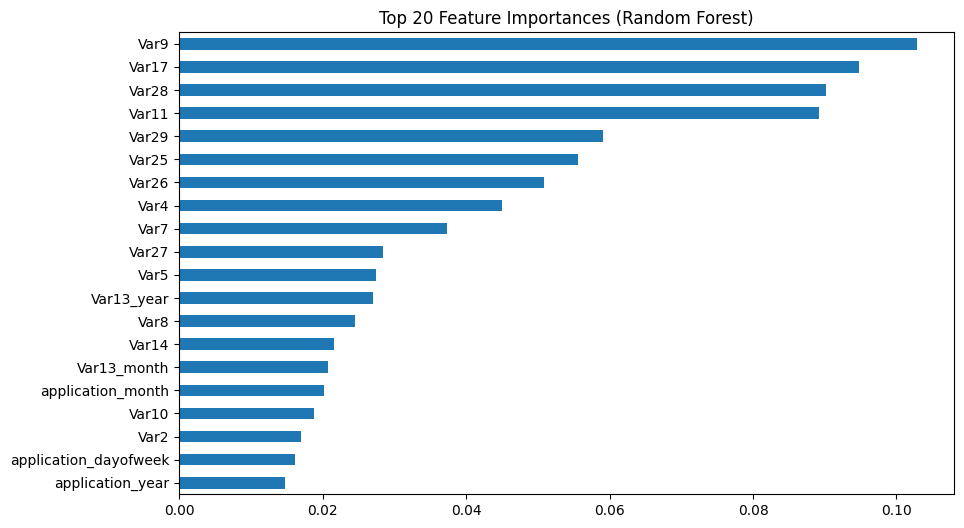

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and plot top 20
top_features = feature_importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


In [43]:
from sklearn.metrics import precision_recall_curve, f1_score

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_proba_rf)

# Compute F1 scores
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find best threshold
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
print(f"Best threshold: {best_threshold:.4f} with F1: {f1_scores[best_idx]:.4f}")

# Predict with new threshold
y_pred_opt = (y_proba_rf >= best_threshold).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print("=== Random Forest Performance (Optimized Threshold) ===")
print(classification_report(y_val, y_pred_opt, digits=4))


Best threshold: 0.4926 with F1: 0.2188
=== Random Forest Performance (Optimized Threshold) ===
              precision    recall  f1-score   support

         0.0     0.9776    0.9515    0.9644      7119
         1.0     0.1687    0.3111    0.2188       225

    accuracy                         0.9319      7344
   macro avg     0.5732    0.6313    0.5916      7344
weighted avg     0.9528    0.9319    0.9416      7344



In [44]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_resampled.shape)


Original training set shape: (29374, 40)
Resampled training set shape: (56944, 40)


In [45]:
rf_resampled = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_resampled.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf_resampled = rf_resampled.predict(X_val)
y_proba_rf_resampled = rf_resampled.predict_proba(X_val)[:, 1]

# Evaluate
print("\n=== Random Forest Performance (SMOTE Resampled) ===")
print(classification_report(y_val, y_pred_rf_resampled, digits=4))
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_val, y_proba_rf_resampled))



=== Random Forest Performance (SMOTE Resampled) ===
              precision    recall  f1-score   support

         0.0     0.9764    0.8932    0.9330      7119
         1.0     0.0854    0.3156    0.1345       225

    accuracy                         0.8755      7344
   macro avg     0.5309    0.6044    0.5337      7344
weighted avg     0.9491    0.8755    0.9085      7344

ROC-AUC: 0.6504864915484385


In [46]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run search on resampled data (best practice)
rf_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", rf_search.best_params_)
print("Best ROC-AUC (CV):", rf_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  18.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  19.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  18.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10

/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate

Best parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best ROC-AUC (CV): 0.9981592731829805


In [47]:
{
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'max_depth': None
}


{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

In [48]:
# Train the optimized Random Forest
best_rf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

best_rf.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_best = best_rf.predict(X_val)
y_proba_best = best_rf.predict_proba(X_val)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, roc_auc_score

print("\n=== Best Random Forest Performance ===")
print(classification_report(y_val, y_pred_best, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_best))



=== Best Random Forest Performance ===
              precision    recall  f1-score   support

         0.0     0.9707    0.9975    0.9839      7119
         1.0     0.3793    0.0489    0.0866       225

    accuracy                         0.9684      7344
   macro avg     0.6750    0.5232    0.5353      7344
weighted avg     0.9526    0.9684    0.9564      7344

ROC-AUC: 0.6943134959654134


In [49]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])),
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_val)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

print("\n=== XGBoost Performance ===")
print(classification_report(y_val, y_pred_xgb, digits=4))
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_val, y_proba_xgb))



=== XGBoost Performance ===
              precision    recall  f1-score   support

         0.0     0.9713    0.9985    0.9847      7119
         1.0     0.5769    0.0667    0.1195       225

    accuracy                         0.9699      7344
   macro avg     0.7741    0.5326    0.5521      7344
weighted avg     0.9592    0.9699    0.9582      7344

ROC-AUC: 0.7278690827363394


In [50]:
# Average probabilities
avg_proba = (y_proba_best + y_proba_xgb) / 2

# Threshold 0.5 (or tune as before)
y_pred_blend = (avg_proba >= 0.5).astype(int)

print("\n=== Blended Model Performance ===")
print(classification_report(y_val, y_pred_blend, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, avg_proba))



=== Blended Model Performance ===
              precision    recall  f1-score   support

         0.0     0.9712    0.9989    0.9848      7119
         1.0     0.6364    0.0622    0.1134       225

    accuracy                         0.9702      7344
   macro avg     0.8038    0.5305    0.5491      7344
weighted avg     0.9609    0.9702    0.9581      7344

ROC-AUC: 0.7216200777262723


In [51]:
from sklearn.metrics import precision_recall_curve, classification_report

precision, recall, thresholds = precision_recall_curve(y_val, y_proba_xgb)
f1_scores = 2 * (precision * recall) / (precision + recall)

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
print(f"Best threshold: {best_threshold:.4f} with F1: {f1_scores[best_idx]:.4f}")

# Predict with optimized threshold
y_pred_xgb_opt = (y_proba_xgb >= best_threshold).astype(int)
print("\n=== XGBoost Performance (Optimized Threshold) ===")
print(classification_report(y_val, y_pred_xgb_opt, digits=4))


Best threshold: 0.1107 with F1: 0.2397

=== XGBoost Performance (Optimized Threshold) ===
              precision    recall  f1-score   support

         0.0     0.9768    0.9687    0.9727      7119
         1.0     0.2148    0.2711    0.2397       225

    accuracy                         0.9473      7344
   macro avg     0.5958    0.6199    0.6062      7344
weighted avg     0.9534    0.9473    0.9502      7344



In [53]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, avg_proba_blend)
f1_scores = 2 * (precision * recall) / (precision + recall)

best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
print(f"Best threshold: {best_threshold:.4f} with F1: {f1_scores[best_idx]:.4f}")

# Predict with optimized threshold
y_pred_blend_opt = (avg_proba_blend >= best_threshold).astype(int)
print("\n=== Blended Model Performance (Optimized Threshold) ===")
print(classification_report(y_val, y_pred_blend_opt, digits=4))


Best threshold: 0.2100 with F1: 0.2287

=== Blended Model Performance (Optimized Threshold) ===
              precision    recall  f1-score   support

         0.0     0.9751    0.9805    0.9778      7119
         1.0     0.2527    0.2089    0.2287       225

    accuracy                         0.9568      7344
   macro avg     0.6139    0.5947    0.6033      7344
weighted avg     0.9530    0.9568    0.9548      7344



In [52]:
# Average probabilities
avg_proba_blend = (y_proba_xgb + y_proba_best) / 2

# Threshold 0.5 (or tune)
y_pred_blend = (avg_proba_blend >= 0.5).astype(int)

print("\n=== Blended Model Performance ===")
print(classification_report(y_val, y_pred_blend, digits=4))
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_val, avg_proba_blend))



=== Blended Model Performance ===
              precision    recall  f1-score   support

         0.0     0.9712    0.9989    0.9848      7119
         1.0     0.6364    0.0622    0.1134       225

    accuracy                         0.9702      7344
   macro avg     0.8038    0.5305    0.5491      7344
weighted avg     0.9609    0.9702    0.9581      7344

ROC-AUC: 0.7216200777262723


In [54]:
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# Train
eec.fit(X_train, y_train)

# Predict
y_pred_eec = eec.predict(X_val)
y_proba_eec = eec.predict_proba(X_val)[:, 1]

# Evaluate
print("\n=== EasyEnsemble Performance ===")
print(classification_report(y_val, y_pred_eec, digits=4))
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_val, y_proba_eec))



=== EasyEnsemble Performance ===
              precision    recall  f1-score   support

         0.0     0.9852    0.7678    0.8630      7119
         1.0     0.0796    0.6356    0.1415       225

    accuracy                         0.7638      7344
   macro avg     0.5324    0.7017    0.5023      7344
weighted avg     0.9575    0.7638    0.8409      7344

ROC-AUC: 0.7705910630394407


In [58]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

bbc.fit(X_train, y_train)

# Predict
y_pred_bbc = bbc.predict(X_val)
y_proba_bbc = bbc.predict_proba(X_val)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, roc_auc_score

print("\n=== Balanced Bagging Performance ===")
print(classification_report(y_val, y_pred_bbc, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_bbc))



=== Balanced Bagging Performance ===
              precision    recall  f1-score   support

         0.0     0.9822    0.8897    0.9337      7119
         1.0     0.1229    0.4889    0.1964       225

    accuracy                         0.8775      7344
   macro avg     0.5525    0.6893    0.5650      7344
weighted avg     0.9558    0.8775    0.9111      7344

ROC-AUC: 0.7761208659143762


In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=42, n_jobs=-1))
]

stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# Train
stack.fit(X_train, y_train)

# Predict
y_pred_stack = stack.predict(X_val)
y_proba_stack = stack.predict_proba(X_val)[:, 1]

# Evaluate
print("\n=== Stacking Classifier Performance ===")
print(classification_report(y_val, y_pred_stack, digits=4))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_stack))



=== Stacking Classifier Performance ===
              precision    recall  f1-score   support

         0.0     0.9715    0.9990    0.9850      7119
         1.0     0.6957    0.0711    0.1290       225

    accuracy                         0.9706      7344
   macro avg     0.8336    0.5351    0.5570      7344
weighted avg     0.9630    0.9706    0.9588      7344

ROC-AUC: 0.7742373304615191


feature check debt/income

In [57]:
dev_df['Var5_Var10_ratio'] = dev_df['Var5'] / (dev_df['Var10'] + 1e-6)
test_df['Var5_Var10_ratio'] = test_df['Var5'] / (test_df['Var10'] + 1e-6)


In [60]:
from sklearn.metrics import average_precision_score

from sklearn.metrics import average_precision_score

pr_auc_easy = average_precision_score(y_val, y_proba_eec)
print(f"EasyEnsemble PR-AUC: {pr_auc_easy:.4f}")


pr_auc_bbc = average_precision_score(y_val, y_proba_bbc)
print(f"Balanced Bagging PR-AUC: {pr_auc_bbc:.4f}")

pr_auc_stack = average_precision_score(y_val, y_proba_stack)
print(f"Stacking Classifier PR-AUC: {pr_auc_stack:.4f}")



EasyEnsemble PR-AUC: 0.2172
Balanced Bagging PR-AUC: 0.1627
Stacking Classifier PR-AUC: 0.2211


In [62]:
import numpy as np


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

# Base RandomForest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf_cal = CalibratedClassifierCV(rf, cv=3)

# Train
rf_cal.fit(X_train, y_train)

# Predict probs
y_proba_rf = rf_cal.predict_proba(X_val)[:, 1]

# ROC-AUC + PR-AUC
roc_rf = roc_auc_score(y_val, y_proba_rf)
pr_auc_rf = average_precision_score(y_val, y_proba_rf)
print(f"Random Forest ROC-AUC: {roc_rf:.4f} | PR-AUC: {pr_auc_rf:.4f}")

# Threshold tuning
prec, rec, thresh = precision_recall_curve(y_val, y_proba_rf)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

# Final prediction
y_pred_rf = (y_proba_rf >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_rf, digits=4))


Random Forest ROC-AUC: 0.7773 | PR-AUC: 0.1934
Best threshold: 0.0476 with F1: 0.2697
              precision    recall  f1-score   support

         0.0     0.9783    0.9667    0.9724      7119
         1.0     0.2330    0.3200    0.2697       225

    accuracy                         0.9469      7344
   macro avg     0.6056    0.6434    0.6211      7344
weighted avg     0.9554    0.9469    0.9509      7344



In [64]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=200, scale_pos_weight=5, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

roc_xgb = roc_auc_score(y_val, y_proba_xgb)
pr_auc_xgb = average_precision_score(y_val, y_proba_xgb)
print(f"XGBoost ROC-AUC: {roc_xgb:.4f} | PR-AUC: {pr_auc_xgb:.4f}")

prec, rec, thresh = precision_recall_curve(y_val, y_proba_xgb)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

y_pred_xgb = (y_proba_xgb >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_xgb, digits=4))


XGBoost ROC-AUC: 0.7237 | PR-AUC: 0.1800
Best threshold: 0.2702 with F1: 0.2440
              precision    recall  f1-score   support

         0.0     0.9746    0.9902    0.9823      7119
         1.0     0.3694    0.1822    0.2440       225

    accuracy                         0.9654      7344
   macro avg     0.6720    0.5862    0.6132      7344
weighted avg     0.9560    0.9654    0.9597      7344



In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_proba_log = logreg.predict_proba(X_val)[:, 1]

roc_log = roc_auc_score(y_val, y_proba_log)
pr_auc_log = average_precision_score(y_val, y_proba_log)
print(f"Logistic Regression ROC-AUC: {roc_log:.4f} | PR-AUC: {pr_auc_log:.4f}")

prec, rec, thresh = precision_recall_curve(y_val, y_proba_log)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

y_pred_log = (y_proba_log >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_log, digits=4))


Logistic Regression ROC-AUC: 0.7324 | PR-AUC: 0.1554
Best threshold: 0.7515 with F1: 0.2134
              precision    recall  f1-score   support

         0.0     0.9746    0.9810    0.9778      7119
         1.0     0.2416    0.1911    0.2134       225

    accuracy                         0.9568      7344
   macro avg     0.6081    0.5861    0.5956      7344
weighted avg     0.9521    0.9568    0.9544      7344



/Users/akshma/Documents/DS/semester4/ubproject/UBproject/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
from collections import Counter


In [73]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, precision_recall_curve

# Resample
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

print(f"Resampled dataset shape: {Counter(y_resampled)}")

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)

# Predict probs
y_proba_rf = rf.predict_proba(X_val)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_val, y_proba_rf)
pr_auc = average_precision_score(y_val, y_proba_rf)
print(f"Random Forest (SMOTE + Tomek) ROC-AUC: {roc_auc:.4f} | PR-AUC: {pr_auc:.4f}")

# Best threshold
prec, rec, thresh = precision_recall_curve(y_val, y_proba_rf)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

# Final prediction
y_pred_rf = (y_proba_rf > best_thresh).astype(int)
print(classification_report(y_val, y_pred_rf, digits=4))


Resampled dataset shape: Counter({0.0: 28407, 1.0: 28407})
Random Forest (SMOTE + Tomek) ROC-AUC: 0.6960 | PR-AUC: 0.1279
Best threshold: 0.3050 with F1: 0.1805
              precision    recall  f1-score   support

         0.0     0.9735    0.9819    0.9777      7119
         1.0     0.2134    0.1556    0.1799       225

    accuracy                         0.9566      7344
   macro avg     0.5935    0.5687    0.5788      7344
weighted avg     0.9502    0.9566    0.9533      7344



In [70]:
import lightgbm as lgb

# LGBM Model
lgbm = lgb.LGBMClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42
)

lgbm.fit(X_resampled, y_resampled)

# Predict
y_proba_lgb = lgbm.predict_proba(X_val)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_val, y_proba_lgb)
pr_auc = average_precision_score(y_val, y_proba_lgb)
print(f"LightGBM ROC-AUC: {roc_auc:.4f} | PR-AUC: {pr_auc:.4f}")

# Best threshold
prec, rec, thresh = precision_recall_curve(y_val, y_proba_lgb)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

# Final prediction
y_pred_lgb = (y_proba_lgb > best_thresh).astype(int)
print(classification_report(y_val, y_pred_lgb, digits=4))


[LightGBM] [Info] Number of positive: 28407, number of negative: 28407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4559
[LightGBM] [Info] Number of data points in the train set: 56814, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM ROC-AUC: 0.7210 | PR-AUC: 0.1800
Best threshold: 0.0671 with F1: 0.2242
              precision    recall  f1-score   support

         0.0     0.9767    0.9615    0.9691      7119
         1.0     0.1845    0.2756    0.2210       225

    accuracy                         0.9405      7344
   macro avg     0.5806    0.6185    0.5951      7344
weighted avg     0.9525    0.9405    0.9461      7344



In [71]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500, 1000],
    'scale_pos_weight': [1, 5, 10]
}

lgbm = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
grid = RandomizedSearchCV(lgbm, param_distributions=param_grid, scoring='average_precision', n_iter=10, cv=3, n_jobs=-1, verbose=2)
grid.fit(X_resampled, y_resampled)

print("Best params:", grid.best_params_)
print("Best PR-AUC (CV):", grid.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 18938, number of negative: 18938
[LightGBM] [Info] Number of positive: 18938, number of negative: 18938
[LightGBM] [Info] Number of positive: 18938, number of negative: 18938
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4550
[LightGBM] [Info] Number of data points in the train set: 37876, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4543
[LightGBM] [Info] Number of positi

In [75]:
from sklearn.metrics import (
    roc_auc_score, 
    average_precision_score, 
    classification_report,
    precision_recall_curve,
    ConfusionMatrixDisplay
)
import seaborn as sns
# best_params 
best_params = {
    'scale_pos_weight': 10,
    'num_leaves': 70,
    'n_estimators': 500,
    'max_depth': 20,
    'learning_rate': 0.1
}

# Fit LightGBM with best params
best_lgbm = lgb.LGBMClassifier(
    **best_params, 
    random_state=42
)
best_lgbm.fit(X_resampled, y_resampled)

# Predict probabilities on validation set
y_proba_lgbm = best_lgbm.predict_proba(X_val)[:, 1]

# ROC-AUC & PR-AUC
roc_auc = roc_auc_score(y_val, y_proba_lgbm)
pr_auc = average_precision_score(y_val, y_proba_lgbm)
print(f"\nLightGBM (tuned) ROC-AUC: {roc_auc:.4f} | PR-AUC: {pr_auc:.4f}")

# Threshold optimization for best F1
prec, rec, thresh = precision_recall_curve(y_val, y_proba_lgbm)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-6)
best_thresh = thresh[np.argmax(f1_scores)]
print(f"Best threshold: {best_thresh:.4f} with F1: {np.max(f1_scores):.4f}")

# Final prediction using best threshold
y_pred_lgbm = (y_proba_lgbm >= best_thresh).astype(int)
print(classification_report(y_val, y_pred_lgbm, digits=4))

[LightGBM] [Info] Number of positive: 28407, number of negative: 28407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4559
[LightGBM] [Info] Number of data points in the train set: 56814, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM (tuned) ROC-AUC: 0.7155 | PR-AUC: 0.1771
Best threshold: 0.1966 with F1: 0.2173
              precision    recall  f1-score   support

         0.0     0.9737    0.9924    0.9830      7119
         1.0     0.3864    0.1511    0.2173       225

    accuracy                         0.9666      7344
   macro avg     0.6800    0.5718    0.6001      7344
weighted avg     0.9557    0.9666    0.9595      7344

